In [1]:
"""
In this jupyter notebook, we will be learning how to use custom training loops(not model.fit() method.) We will do a simple linear regression.

"""

import tensorflow as tf
import numpy as np 
import matplotlib.pyplot as plt
%matplotlib inline

In [6]:
class Model(tf.keras.Model):
    
    def __init__(self):
        super(Model,self).__init__()
        self.w=tf.Variable(3,dtype=tf.float32)
        self.b=tf.Variable(1,dtype=tf.float32)

    def call(self,x):
        return tf.multiply(x,self.w)+self.b
    
#testing the model

model=Model()
try:
    print(model(tf.constant(3.0)))
except:
    print("The model is not build properly.")

tf.Tensor(10.0, shape=(), dtype=float32)


In [16]:
class train_model(tf.keras.Model):

    def __init__(self,epochs,learning_rate):
        super(train_model,self).__init__()
        self.model=Model()
        self.Weights=[]
        self.Biases=[]
        self.epochs=epochs
        self.lr=learning_rate

    def loss_fnc(self,y_true,y_pred):
        return tf.reduce_mean(tf.square(y_true - y_pred)) 
    
    def report(self, loss):
        return f"W = {self.model.w.numpy():1.2f}, b = {self.model.b.numpy():1.2f}, loss={loss:2.5f}"
    
    def backward_propagation(self,x,y):
        
        for epoch in range(self.epochs):

            with tf.GradientTape() as tape:
                y_pred=self.model(x)
                loss=self.loss_fnc(y,y_pred)

            dw,db=tape.gradient(loss,[self.model.w,self.model.b])

            self.model.w.assign_sub(self.lr*dw)

            self.model.b.assign_sub(self.lr*db)

            self.Weights.append(self.model.w.numpy())

            self.Biases.append(self.model.b.numpy())

            print(f"Epoch {epoch:2d}:")
            print("    ", self.report(loss))

    def call(self,labeled_data):
        x,y=labeled_data
        print("Start Training Process: ")

        self.backward_propagation(x,y)

In [17]:
## Defining the training dataset 
# The actual line
TRUE_W = 3.0
TRUE_B = 2.0


NUM_EXAMPLES=201

# A vector of random x values
x = tf.linspace(-2,2, NUM_EXAMPLES)
x = tf.cast(x, tf.float32)

def f(x):
  return x * TRUE_W + TRUE_B

# Generate some noise
noise = tf.random.normal(shape=[NUM_EXAMPLES])

# Calculate y
y = f(x) + noise

In [31]:
epochs=500
T=train_model(learning_rate=0.001,epochs=epochs)

In [32]:
T((x,y))

Start Training Process: 
Epoch  0:
     W = 3.00, b = 1.00, loss=2.07324
Epoch  1:
     W = 3.00, b = 1.00, loss=2.06907
Epoch  2:
     W = 3.00, b = 1.01, loss=2.06491
Epoch  3:
     W = 3.00, b = 1.01, loss=2.06076
Epoch  4:
     W = 3.00, b = 1.01, loss=2.05663
Epoch  5:
     W = 3.00, b = 1.01, loss=2.05252
Epoch  6:
     W = 3.00, b = 1.01, loss=2.04843
Epoch  7:
     W = 3.00, b = 1.02, loss=2.04435
Epoch  8:
     W = 3.00, b = 1.02, loss=2.04029
Epoch  9:
     W = 3.00, b = 1.02, loss=2.03624
Epoch 10:
     W = 3.00, b = 1.02, loss=2.03221
Epoch 11:
     W = 3.00, b = 1.02, loss=2.02820
Epoch 12:
     W = 3.00, b = 1.03, loss=2.02420
Epoch 13:
     W = 3.00, b = 1.03, loss=2.02022
Epoch 14:
     W = 3.00, b = 1.03, loss=2.01626
Epoch 15:
     W = 3.00, b = 1.03, loss=2.01231
Epoch 16:
     W = 3.00, b = 1.03, loss=2.00838
Epoch 17:
     W = 3.00, b = 1.04, loss=2.00446
Epoch 18:
     W = 3.00, b = 1.04, loss=2.00056
Epoch 19:
     W = 3.00, b = 1.04, loss=1.99667
Epoch 20:
     

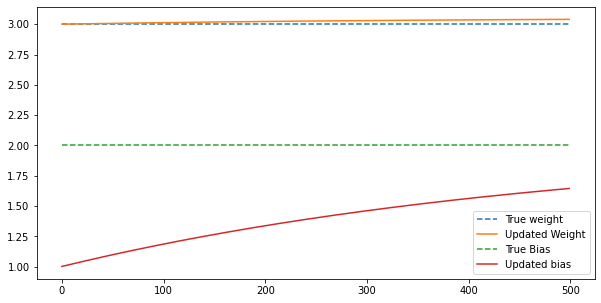

In [38]:
## Visualing the plots.
# First visualising how the weights are updated with each epochs
plt.figure(figsize=(10,5))
plt.plot([TRUE_W]*epochs,'--',label="True weight")

plt.plot(T.Weights,label="Updated Weight")
plt.plot([TRUE_B]*epochs,'--',label="True Bias")

plt.plot(T.Biases,label="Updated bias")
plt.legend()
plt.show()

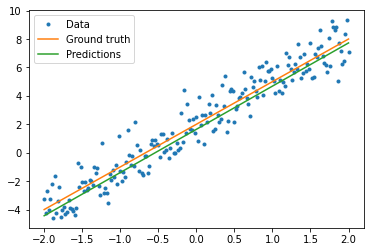

In [39]:
## Visualing the predicted value t
plt.plot(x, y, '.', label="Data")
plt.plot(x, f(x), label="Ground truth")
plt.plot(x, T.model(x), label="Predictions")
plt.legend()
plt.show()

